# Graficas en 3D

Si queremos graficar en 3D solamente debemos agregar un argumento más a las funciones `plot()` y/o `scatter()`:

In [1]:
using Plots
gr()

Plots.GRBackend()

In [6]:
zs = range(0,stop=4pi,length=201)
xs = [cos(z) for z in zs]
ys = [sin(z) for z in zs]

201-element Array{Float64,1}:
  0.0                  
  0.06279051952931337  
  0.12533323356430426  
  0.1873813145857246   
  0.2486898871648548   
  0.3090169943749474   
  0.3681245526846779   
  0.42577929156507266  
  0.4817536741017153   
  0.5358267949789967   
  0.5877852522924731   
  0.6374239897486896   
  0.6845471059286886   
  ⋮                    
 -0.6374239897486897   
 -0.5877852522924735   
 -0.5358267949789973   
 -0.4817536741017163   
 -0.42577929156507244  
 -0.3681245526846781   
 -0.3090169943749479   
 -0.2486898871648556   
 -0.1873813145857258   
 -0.125333233564304    
 -0.06279051952931351  
 -4.898587196589413e-16

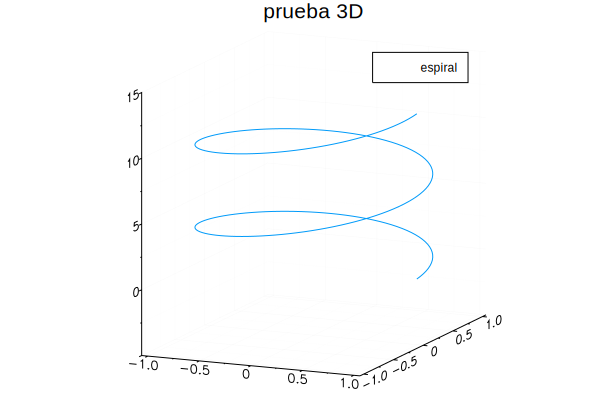

In [7]:
plot(xs,ys,zs,label="espiral",title="prueba 3D")

## Superficies

Pero `Plots.jl` puede hacer mucho más que eso. En sus cursos de cálculo diferencial e integral de muchas variables (o en termodinámica) analizarán la geometría de superficies dos dimensionales inmersas en $\mathbb{R}^3$.

Para visualizar tenemos que usar la función `surface()` y definir el dominio en $\mathbb{R}^2$ para esta. Es decir, vamos a necesitar dos arreglos de valores $X_i$ $Y_j$ para cada punto de la superficie: $Z_{i,j} := Z(X_i,Y_j)$.

Note que el tercer argumento es un arreglo en dos dimensiones de tamaño $size(X_i)\times size(Y_j)$

```julia
surface(valores_x,valores_y,matriz_z)
```

En el siguiente ejemplo vamos a dibujar la superficie
$$z(x,y) = \sin(x)\cos(x)$$
en el dominio $x\in[-\pi,\pi]$, $y\in[0,2\pi]$

In [9]:
xs = range(-pi,stop=pi, length=201)
ys = range(0,stop=2pi,length = 101)

zs = [sin(x)*cos(y) for x in xs, y in ys]

201×101 Array{Float64,2}:
 -1.22465e-16  -1.22223e-16  -1.21499e-16  …  -1.22223e-16  -1.22465e-16
 -0.0314108    -0.0313488    -0.0311631       -0.0313488    -0.0314108  
 -0.0627905    -0.0626666    -0.0622954       -0.0626666    -0.0627905  
 -0.0941083    -0.0939226    -0.0933662       -0.0939226    -0.0941083  
 -0.125333     -0.125086     -0.124345        -0.125086     -0.125333   
 -0.156434     -0.156126     -0.155201     …  -0.156126     -0.156434   
 -0.187381     -0.187012     -0.185904        -0.187012     -0.187381   
 -0.218143     -0.217713     -0.216423        -0.217713     -0.218143   
 -0.24869      -0.248199     -0.246729        -0.248199     -0.24869    
 -0.278991     -0.278441     -0.276791        -0.278441     -0.278991   
 -0.309017     -0.308407     -0.30658      …  -0.308407     -0.309017   
 -0.338738     -0.338069     -0.336067        -0.338069     -0.338738   
 -0.368125     -0.367398     -0.365222        -0.367398     -0.368125   
  ⋮                      

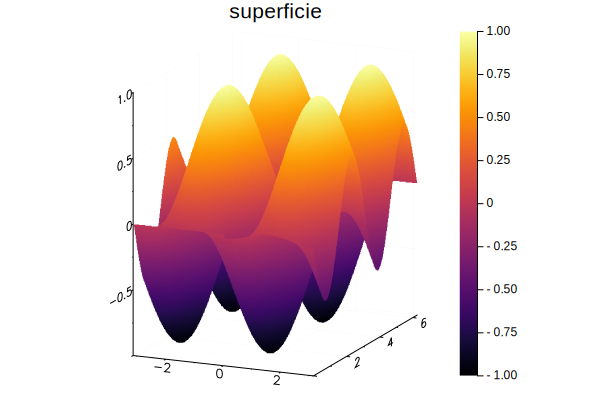

In [10]:
surface(xs,ys,zs,title="superficie")

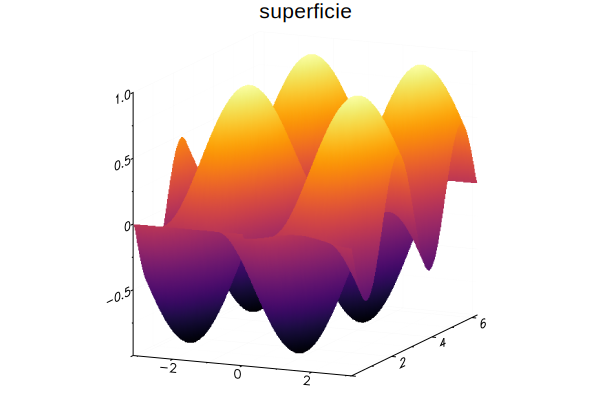

In [12]:
surface(xs,ys,zs,title="superficie", colorbar=false)

En la clase intentamos dibujar una superficie y tuvimos problemas, básicamente porque debemos reestringuir los valores de $z$ a los reales. Para lograrlo debemos definir la matriz $Z_{i,j}$ con cuidado.



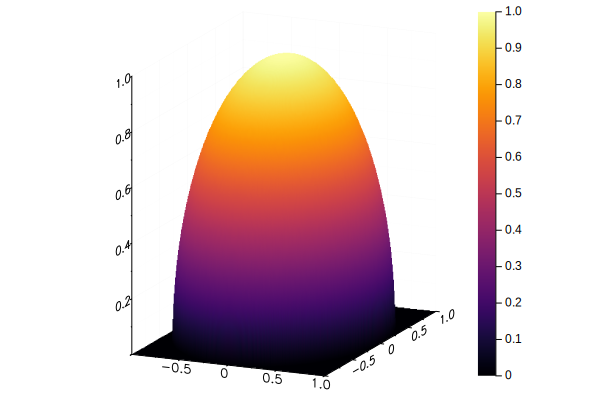

In [11]:
xs = range(-1,stop=1,length=201)
ys = range(-1, stop=1, length = 201)
zs = zeros(Float64,201,201)
for i in 1:201
    for j in 1:201
        if (xs[i]^2+ys[j]^2 <= 1)
            zs[i,j] = sqrt(1-(xs[i]^2+ys[j]^2))
        else
            zs[i,j] = 0
        end
    end
end


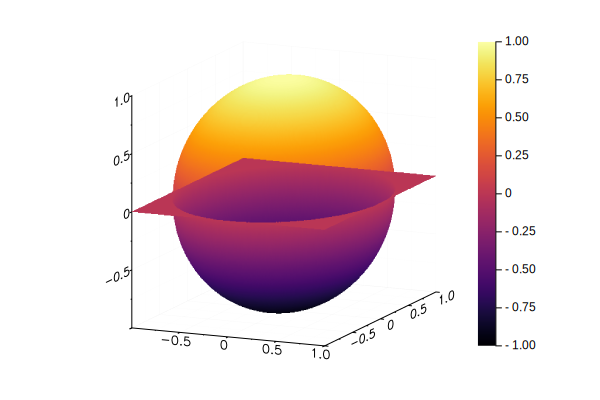

In [17]:
surface(xs,ys,zs,ratio=1,grid=true)
surface!(xs,ys,-zs,grid=true)

## Mapas de Calor

La función heatmap nos permite graficar un mapa de calor almacenado en una matriz.La sintaxis de la función es:
```julia
heatmap(matriz, color= gradiente_de_color)
```
La variable `gradiente_de_color` debe de ser un objeto tipo *símbolo* de todos los posibles gradientes de colores en Julia. Una lista de todos los gradientes de color posibles se muestran en la [documentación oficial de Plots](http://docs.juliaplots.org/latest/colors/).

A continuación mostramos algunos ejemplos simples de como usar la función.

In [13]:
M=[1 2 3; 4 5 6; 7 8 9; 10 11 12]


4×3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

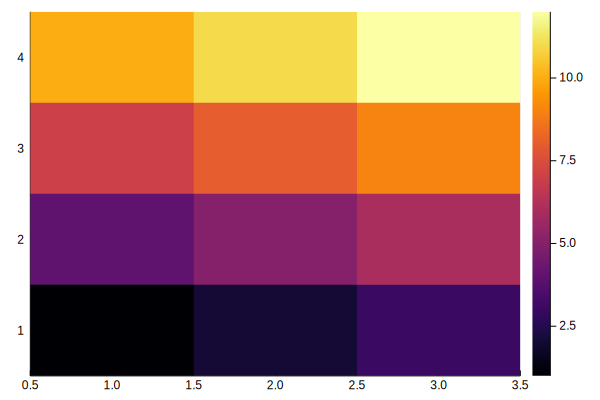

In [14]:
heatmap(M)

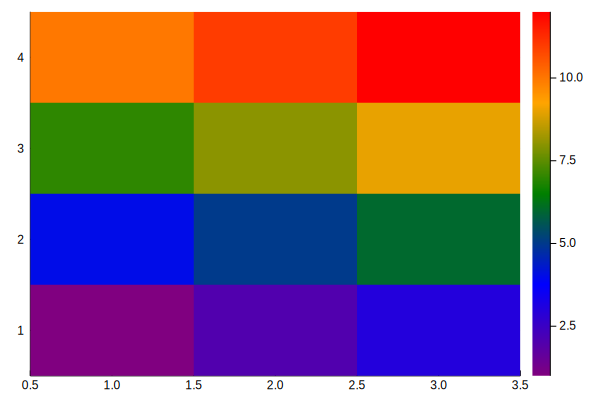

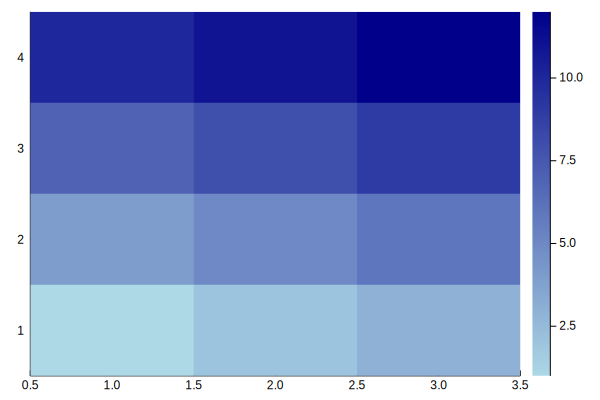

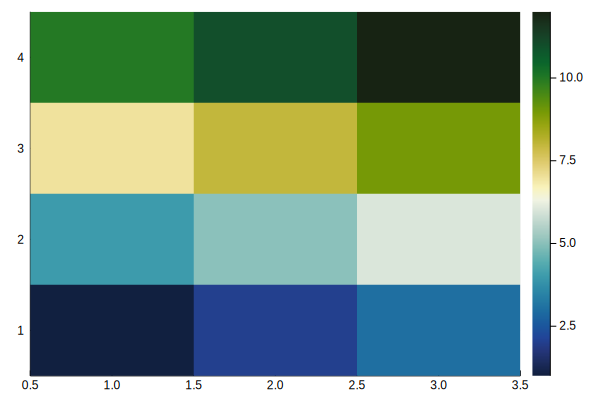

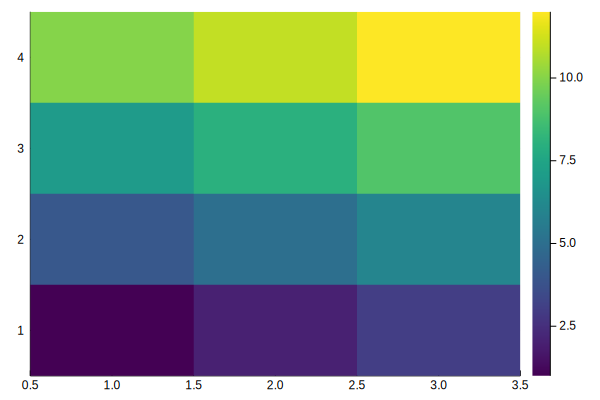

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /home/mvb/.julia/packages/PlotUtils/35TGG/src/color_gradients.jl:40


In [15]:
display(heatmap(M,color= :rainbow))
display(heatmap(M,color= :blues))
display(heatmap(M,color=:delta))
display(heatmap(M,color=:viridis))

Algo interesante de notar es que la función utiliza los índices de la matrix $M$ que gráficamos como los valores mostrados en para la coordenada (x,y). Es decir, el elemento de matriz $M_{i,j}$ Está graficado con coordenadas $(i,j)$. Podemos cambiar los valores de las coordenadas X y Y dándoselas de manera explícita a la función. La sintaxis es de la siguiente:

heatmap(valores_x,valores_y,matriz,color= gradiente_de_color)

Dónde valores_x y valores_y son vectores cuya longitud es igual que el número de columnas y número de renglones de matriz.

Veamos algunos ejemplos:


In [ ]:
equis=[-8, -6,-4]
ye=[3, 4, 5, 6]
heatmap(equis,ye,M)


┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /home/mvb/.julia/packages/PlotUtils/35TGG/src/color_gradients.jl:40


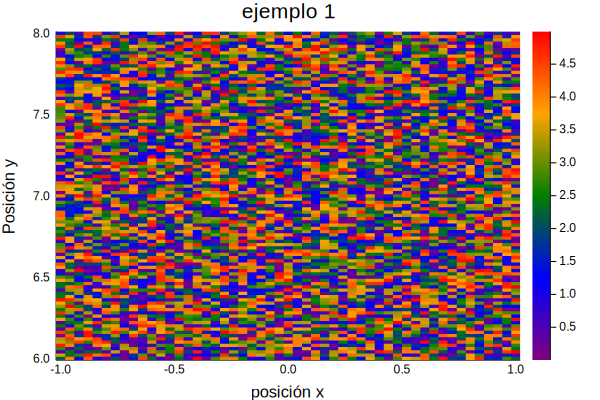

In [16]:
X=range(-1,stop=1,length=51)
Y=range(6,stop=8,length=101)
M=[rand()*5 for x in X, y in Y]
heatmap(X,Y,M,color=:rainbow,title="ejemplo 1",xlabel="posición x",ylabel="Posición y")

# Campos vectoriales

La función quiver nos permite dibujar campos vectoriales. Su sintaxis básica es de la siguiente forma:
```julia
quiver(valores_x,valores_y,gradient=(valores_dx,valores_dy))
```
Donde `valores_x`,`valores_y`,`valores_dx` y `valores_dy` son arreglos de tamaño $n$, donde $n$ es el número de vectores que queremos gráficar.

En escencia, la función dibuja un vector con coordenadas (`valores_dx[i], valores_dy[i]`) y con origen toma el punto (`valores_x[i], valores_y[i]`) para toda $i \in {1,...,n}$. A continuación mostramos algunos ejemplos:

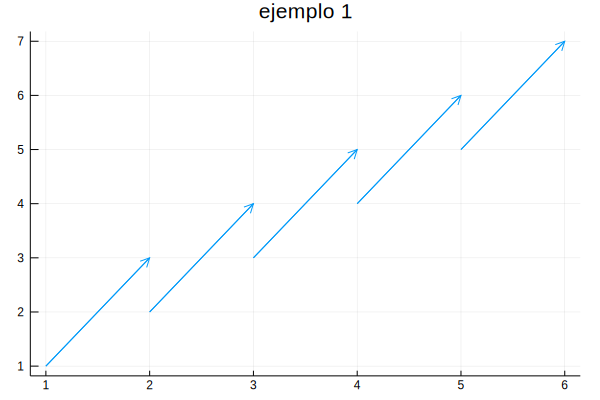

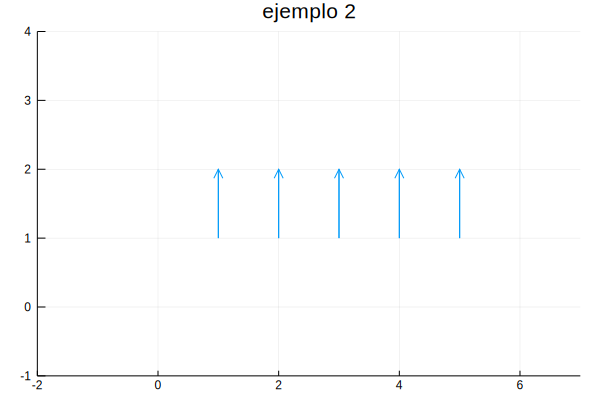

In [17]:
X=[i for i in 1:5]
Y=[i for i in 1:5]
U=[1 for x in X]
V=[2 for y in Y]
display(quiver(X,Y,gradient=(U,V),title="ejemplo 1"))
X=[i for i in 1:5]
Y=[1 for i in 1:5]
U=[0 for x in X]
V=[1 for y in Y]
display(quiver(X,Y,gradient=(U,V),xlim=(-2,7),ylim=(-1,4),title="ejemplo 2"))


Podemos utilizar un ejemplo más elaborado. Supongamos que tenemos una función $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2$ y que queremos graficarla en el intervalo $[-1,1] \times [-2,2]$. Para esto debemos crear una malla del intervalo deseado y, posteriormente, transformarla para poder graficarlo. Usaremos el array comprehension de Julia para todo esto.

Debemos recordar que la siguiente sintaxis:
```julia
L=[f(x,y) for x in X for y in Y]
```
Es equivalente al código
```julia
L=[]
for y in Y
    for x in X
        L.append(f(x,y))
    end
end
```
Ambos códigos nos regresan una lista de $size(X) \times size(Y)$


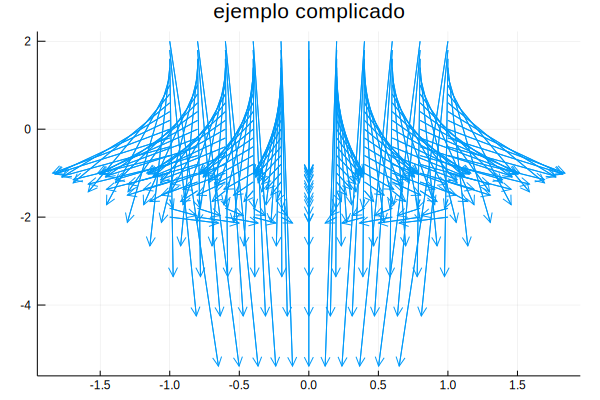

In [20]:
#Creamos la malla
X=range(-1,stop=1,length=11)
Y=range(-2,stop=2,length=21)
#definimos la función f
function f(x,y)
    a=[sin(x)*cos(y),-exp(y)]
    return a
end
U=[f(x,y)[1] for x in X for y in Y]
V=[f(x,y)[2] for x in X for y in Y]
XQ=[x for x in X for y in Y]
YQ=[y for x in X for y in Y]
quiver(XQ,YQ,gradient=(U,V),title="ejemplo complicado")

Como vemos, un problema de lo anterior es que la magnitud de los vectores impide que la dirección del campo se visualice bien, lo que es nuestra prioridad. Podemos cambiar la manera en la que definimos los gradientes para que estén normalizados a una magnitud arbitraria y se puedan ver. Dado que nuestra malla tiene una separación pequeña (0.2 para las X y Y), si el campo vectorial tiene una norma menor a 0.1, se podrá observar sin problema. Usaremos la función normalize que normaliza un vector.


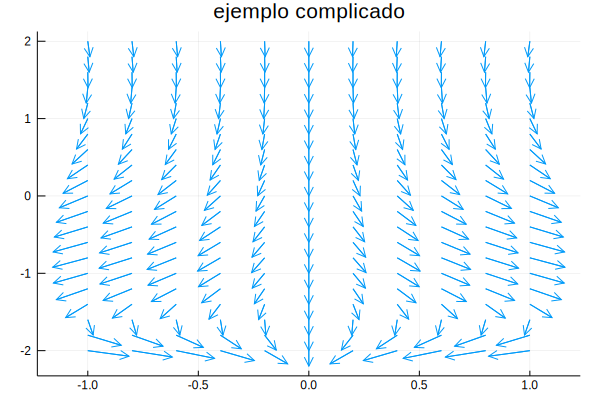

In [24]:
using LinearAlgebra
U=[normalize(f(x,y))[1]*0.2 for x in X for y in Y]
V=[normalize(f(x,y))[2]*0.2 for x in X for y in Y]
quiver(XQ,YQ,gradient=(U,V),title="ejemplo complicado")

In [1]:
using Plots
plotly()

Plots.PlotlyBackend()

In [2]:
zs = range(0,stop=4pi,length=201)
xs = [cos(z) for z in zs]
ys = [sin(z) for z in zs]

201-element Array{Float64,1}:
  0.0                  
  0.06279051952931337  
  0.12533323356430426  
  0.1873813145857246   
  0.2486898871648548   
  0.3090169943749474   
  0.3681245526846779   
  0.42577929156507266  
  0.4817536741017153   
  0.5358267949789967   
  0.5877852522924731   
  0.6374239897486896   
  0.6845471059286886   
  ⋮                    
 -0.6374239897486897   
 -0.5877852522924735   
 -0.5358267949789973   
 -0.4817536741017163   
 -0.42577929156507244  
 -0.3681245526846781   
 -0.3090169943749479   
 -0.2486898871648556   
 -0.1873813145857258   
 -0.125333233564304    
 -0.06279051952931351  
 -4.898587196589413e-16

In [3]:
plot(xs,ys,zs,label="espiral",title="prueba 3D")

ErrorException: only png or svg allowed. got: :html